
=== Training linear_lr_0.0001 (356 params) ===
[linear_lr_0.0001] Epoch 01 | Train Loss: 0.6550 Acc: 0.7757 | Eval Train Acc: 0.8570 | Eval Val Acc: 0.8527
[linear_lr_0.0001] Epoch 02 | Train Loss: 0.5259 Acc: 0.8690 | Eval Train Acc: 0.8793 | Eval Val Acc: 0.8769
[linear_lr_0.0001] Epoch 03 | Train Loss: 0.4601 Acc: 0.8913 | Eval Train Acc: 0.8980 | Eval Val Acc: 0.8955
[linear_lr_0.0001] Epoch 04 | Train Loss: 0.4146 Acc: 0.9078 | Eval Train Acc: 0.9129 | Eval Val Acc: 0.9153
[linear_lr_0.0001] Epoch 05 | Train Loss: 0.3800 Acc: 0.9179 | Eval Train Acc: 0.9214 | Eval Val Acc: 0.9167
[linear_lr_0.0001] Epoch 06 | Train Loss: 0.3531 Acc: 0.9240 | Eval Train Acc: 0.9221 | Eval Val Acc: 0.9282
[linear_lr_0.0001] Epoch 07 | Train Loss: 0.3319 Acc: 0.9282 | Eval Train Acc: 0.9270 | Eval Val Acc: 0.9331
[linear_lr_0.0001] Epoch 08 | Train Loss: 0.3153 Acc: 0.9303 | Eval Train Acc: 0.9360 | Eval Val Acc: 0.9367
[linear_lr_0.0001] Epoch 09 | Train Loss: 0.3024 Acc: 0.9324 | Eval Train Acc: 0

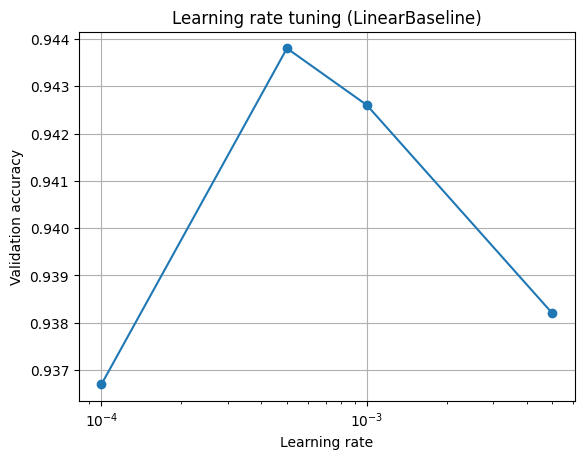

In [1]:
import torch
import torch.optim as optim
import matplotlib.pyplot as plt

from src.model import LinearBaseline
from src.dataset import MentalDataset
from src.trainer import MentalHealthTrainer, load_and_preprocess

# Prétraitement
X_train, y_train, X_val, y_val, mean, std, feature_cols = \
    load_and_preprocess("./data/train.csv")

train_set = MentalDataset(X_train, y_train)
val_set   = MentalDataset(X_val, y_val)

input_dim = X_train.shape[1]
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

trainer = MentalHealthTrainer(
    batch_size=64,
    n_epochs=20,
    eval_samples=10_000,
)

# Valeurs de learning rate testées
learning_rates = [1e-4, 5e-4, 1e-3, 5e-3]
val_accuracies = []

for lr in learning_rates:
    model = LinearBaseline(input_dim)
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=1e-4)

    best_val = trainer.train(
        model,
        train_set,
        val_set,
        optimizer,
        device,
        model_name=f"linear_lr_{lr}"
    )

    val_accuracies.append(best_val)

# Courbe de tuning
plt.figure()
plt.plot(learning_rates, val_accuracies, marker="o")
plt.xscale("log")
plt.xlabel("Learning rate")
plt.ylabel("Validation accuracy")
plt.title("Learning rate tuning (LinearBaseline)")
plt.grid(True)
plt.show()
